First, make sure you can load, read and show an image from the dataset.

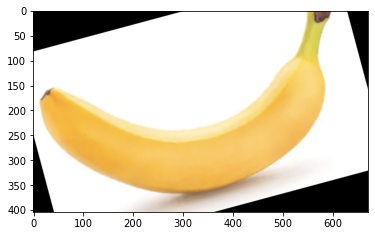

In [1]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt

#Import image (+it should have a 's' https://ell.stackexchange.com/questions/151174/is-bananas-is-possible-by-any-chance)
image = cv.imread("./dataset/test/freshbanana/rotated_by_15_Screen Shot 2018-06-12 at 9.38.04 PM.png")

#Show the image with matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

Try to isolate this apple, let's remove the background using GrabCut algorithm.

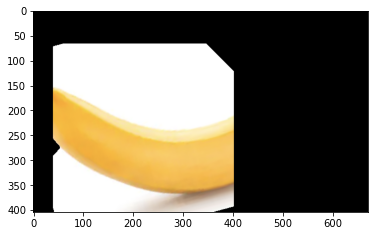

In [2]:
%matplotlib inline
import numpy as np

def grab(image):
    #Create a center of interest rectangle
    margin = .1
    (image_width, image_height, channels) = image.shape
    rect = (int(margin*image_width),int(margin*image_height),int((1-margin)*image_width),int((1-margin)*image_height))

    #Execute grab cut
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    return image*mask2[:,:,np.newaxis]

#Show the image with matplotlib
plt.imshow(cv.cvtColor(grab(image), cv.COLOR_BGR2RGB))
plt.show()

Now, make sure you can load train, test images from the dataset :

In [3]:
import random
from os import walk

def load_images(datasetpath):
    filenames = next(walk(datasetpath), (None, None, []))[2]
    # 💡 Comment the line above if you want to load the whole dataset
    filenames = random.sample(filenames, 100)
    return [grab(cv.imread('./{}/{}'.format(datasetpath, filename))) for filename in filenames]

test_fresh_bananas = load_images("./dataset/test/freshbanana")
test_rotten_bananas = load_images("./dataset/test/rottenbanana")
train_fresh_bananas = load_images("./dataset/train/freshbanana")
train_rotten_bananas = load_images("./dataset/train/rottenbanana")


Now, let's compate fresh orange histograms vs rotten orange histograms.

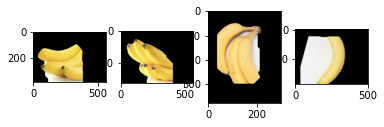

[156.47719266 227.45948452 242.59697756] 26.99%
[ 76.05177515 193.81230219 225.95713499] 73.01%
[160.99711774 237.94819138 249.58726041] 17.96%
[ 73.36323527 190.74550526 228.32763973] 82.04%
[222.69798658 223.26778523 230.03870246] 11.92%
[119.42611882 202.02528311 238.28859081] 88.08%
[123.01965044 207.35198936 231.19134862] 35.63%
[237.19547307 240.60499722 242.3933873 ] 64.37%


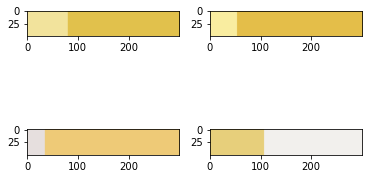

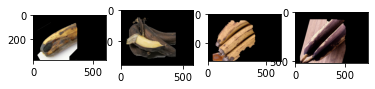

[197.7240175  219.81271564 228.53492384] 34.47%
[ 71.4103807  100.47000885 124.92405932] 65.53%
[135.78551486 187.61838288 206.87764822] 21.28%
[51.83181388 61.57043275 72.37865558] 78.72%
[ 49.24608972  80.52231813 124.0617161 ] 31.94%
[113.61434567 162.08656453 209.59747146] 68.06%
[169.00664332 178.43242819 213.38975704] 42.02%
[50.7615641  50.10244191 78.57302412] 57.98%


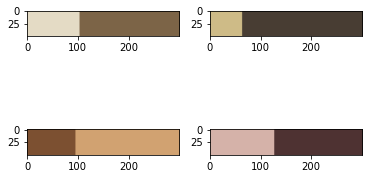

In [11]:
import cv2, numpy as np
from sklearn.cluster import KMeans

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

def retreive_cluster(image):
    reshape = image.reshape((image.shape[0] * image.shape[1], 3))
    reshape = [c for c in reshape if np.mean(c) > 10]
    if(len(reshape) == 0):
        reshape = image.reshape((image.shape[0] * image.shape[1], 3))
    # Find and display most dominant colors
    return KMeans(n_clusters=2,max_iter=30).fit(reshape)

def visualize_img_colors(image):
    cluster = retreive_cluster(image)
    visualize = visualize_colors(cluster, cluster.cluster_centers_)
    visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
    plt.imshow(visualize)


### FRESH BANANAS

#Import fresh orange images
fresh = random.sample(train_fresh_bananas, 4)

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

plt.subplot(221)
visualize_img_colors(fresh[0])
plt.subplot(222)
visualize_img_colors(fresh[1])
plt.subplot(223)
visualize_img_colors(fresh[2])
plt.subplot(224)
visualize_img_colors(fresh[3])
plt.show()

### ROTTEN BANANAS

#Import rotten orange images
rotten = random.sample(train_rotten_bananas, 4)

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

plt.subplot(221)
visualize_img_colors(rotten[0])
plt.subplot(222)
visualize_img_colors(rotten[1])
plt.subplot(223)
visualize_img_colors(rotten[2])
plt.subplot(224)
visualize_img_colors(rotten[3])
plt.show()

In [6]:
fersh_models = [
    [53.4520577, 120.88162919, 161.43551124],
    [119.15711061, 204.31948834, 237.81143717],
    [218.65526906, 235.32390479, 240.13858227],
    [92.64593909, 203.63519194, 228.1096526 ],
    [54.04890388, 78.38026981, 118.68802698],
    [105.28331639, 228.14989135, 251.48555708],
    [93.06612644, 208.0211198, 244.59547675],
    [254.39203187, 254.76028386, 254.87976843],
]
rotten_models = [
    [191.98762215, 191.76160695, 202.81368078],
    [46.69543056, 41.64402886, 62.15377436],
    [197.77850286, 219.84329741, 228.54959582],
    [71.42087445, 100.49090587, 124.94844448],
    [140.59689843, 144.0887337, 156.82017048],
    [72.30038638, 72.46163753, 82.36629255],
    [68.27130682, 110.67613636, 170.58948864],
    [25.20906983, 26.60286873, 40.26716894],
]

def cluster_score(image):
    cluster_centers = retreive_cluster(image).cluster_centers_
    fresh = np.min([np.linalg.norm(center-model) for model in fersh_models for center in cluster_centers])
    rotten = np.min([np.linalg.norm(center-model) for model in rotten_models for center in cluster_centers])
    return (fresh - rotten) / (fresh + rotten + .1)

Notice : looks like rotten orange have wider red and green histograms than fresh orange ones.

fresh image1 average 0.621053940761896
fresh image2 average 0.22326134821353164
fresh image3 average 0.2648611449145217
fresh image4 average 0.2801525191574427


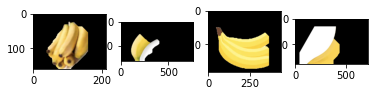

rotten image1 average 0.4684288686217504
rotten image2 average 0.48939988548962515
rotten image3 average 0.5756824293771865
rotten image4 average 0.5731223973047063


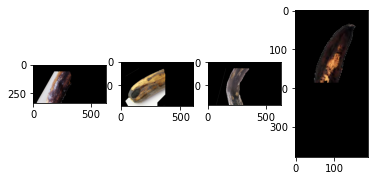

In [7]:
threshold = 1

def abs_dst(image):
    ddepth = cv.CV_16S
    kernel_size = 5
    # Remove noise by blurring with a Gaussian filter
    image_blur = cv.GaussianBlur(image, (3, 3), 0)
    # Convert the image to grayscale
    image_gray = cv.cvtColor(image_blur, cv.COLOR_BGR2GRAY)
    # Apply Laplace function
    dst = cv.Laplacian(image_gray, ddepth, ksize=kernel_size)
    # converting back to uint8
    return cv.convertScaleAbs(dst)

# LAPLACE SCORE

def laplace_score(image):
    arr = np.asarray(abs_dst(image)).flatten()
    filter_arr = arr > threshold
    newarr = arr[filter_arr]
    if(len(newarr) == 0):
        return 0
    return newarr.mean() / 255

### FRESH BANANAS

print("fresh image1 average", laplace_score(fresh[0]))
print("fresh image2 average", laplace_score(fresh[1]))
print("fresh image3 average", laplace_score(fresh[2]))
print("fresh image4 average", laplace_score(fresh[3]))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

### ROTTEN BANANAS

print("rotten image1 average", laplace_score(rotten[0]))
print("rotten image2 average", laplace_score(rotten[1]))
print("rotten image3 average", laplace_score(rotten[2]))
print("rotten image4 average", laplace_score(rotten[3]))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

Now, let's plot our feature vector over the whole train dataset !

/tmp/ipykernel_12695/2535277609.py:29: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return KMeans(n_clusters=2,max_iter=30).fit(reshape)
/tmp/ipykernel_12695/2535277609.py:29: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return KMeans(n_clusters=2,max_iter=30).fit(reshape)
/tmp/ipykernel_12695/2535277609.py:29: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return KMeans(n_clusters=2,max_iter=30).fit(reshape)


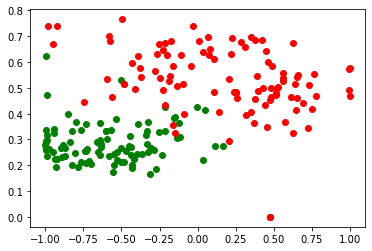

In [12]:
fresh_vectors = np.asarray([[cluster_score(fresh), laplace_score(fresh)] for fresh in train_fresh_bananas]).T
rotten_vectors = np.asarray([[cluster_score(rotten), laplace_score(rotten)] for rotten in train_rotten_bananas]).T

# scatter fresh vectors
xf, yf = fresh_vectors
plt.scatter(xf,yf,color="green")

# scatter rotten vectors
xr, yr = rotten_vectors
plt.scatter(xr,yr,color="red")

plt.show()


Deduce the accuracy (Binary Classification, Logistic Regression) :

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

# create the binary classifier
(_, lf) = np.shape(fresh_vectors)
(_, lr) = np.shape(rotten_vectors)
X = np.concatenate((fresh_vectors, rotten_vectors), axis=1)
y = np.concatenate((np.full((lf), 0), np.full((lr), 1)))
X, y = shuffle(X.T, y, random_state=0)

clf = LogisticRegression(random_state=0).fit(X, y)

# load the test vectors
test_fresh_vectors = fresh_vectors
test_rotten_vectors = rotten_vectors

# calculate the accuracy
(_, ltf) = np.shape(test_fresh_vectors)
(_, ltr) = np.shape(test_rotten_vectors)
tX = np.concatenate((test_fresh_vectors.T, test_rotten_vectors.T), axis=0)
ty = np.concatenate((np.full((ltf), 0), np.full((ltr), 1)))

print("Acc :")
print(1-np.mean(np.abs(clf.predict(tX)-ty)))

Acc :
0.9
